# PSONN

In [15]:
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import *

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from util import *
from cso import Cso

## Dataset - CIFAR 10

In [17]:
(x_train, y_train), (x_test, y_test) = load_cifar10()

In [18]:
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 10)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 10)


Text(0.5, 0, '(32,32,3)')

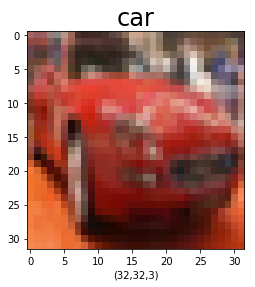

In [19]:
plt.imshow(x_train[5])
plt.title("car",fontsize=24)
plt.xlabel("(32,32,3)")

## Cache Table

In [20]:
table = {}

## Generate Blocks and Layers

In [21]:
def generate_one_block(num_layers, channel):
    block = []
    for i in range(num_layers):
        onelayer = [
            Conv2D(channel,(3,3),strides=(1,1), padding='same'),
            BatchNormalization(),
            Activation("relu"),
#             Dropout(0.3)
            ]
        block += onelayer
    block.append(MaxPool2D())
    block.append(Dropout(0.3))
    return block

In [22]:
def generate_model(num_layers):
#     num_layers = [int(i)+1  for i in num_layers]
    channels = [2**i for i in range(6,10)]
    layers = [Reshape((32,32,3), input_shape=(32,32,3))]
    # Construct each blocks according the number of channels and number of parameter x
    # CONV block
    for i in range(4):
        block = generate_one_block(num_layers[i], channels[i])
        layers += block
    # Dense block
    dense_block = [Flatten()]
    for i in range(num_layers[4]):
        dense_block += [Dense(4096,activation="relu")]
        dense_block += [Dropout(0.4)]
    layers += dense_block
    # Output
    layers += [Dense(10, activation="softmax")]
    # Initial model
    model = k.models.Sequential(layers=layers)
    return model

## Object Function

In [9]:
def objectfunction(x):
    """
    Input : x is a 5-dim Numpy array
    """
    x = [int(i)+1  for i in x]
    if str(x) in table:
        return table[str(x)]
    # Generate Model
    model = generate_model(x)
    # Compile and Train Model
    model.compile(optimizer=k.optimizers.SGD(lr=0.01, momentum=0.9,decay=1e-4),
                  loss="categorical_crossentropy",
                  metrics=['accuracy'])
    res = model.fit(x_train, y_train, batch_size=256, epochs=1,  validation_split=0.2)
    error = 1 - res.history["val_acc"][0]
    table[str(x)] = error
    ## Clear Session and Mem After Evaluation
    k.backend.clear_session()
    tf.reset_default_graph()
    return error

## Cat Swarm Optimization

In [10]:
model = Cso(20, objectfunction, 0,5,dimension=5,iteration=10,mr=5,smp=5,spc=False, cdc=1, srd=0.1,w=1e-1, c=1.05, csi=0.7)

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 37s 918us/step - loss: 1.4585 - acc: 0.4577 - val_loss: 3.0777 - val_acc: 0.1108
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 28s 691us/step - loss: 1.3940 - acc: 0.4945 - val_loss: 2.8075 - val_acc: 0.0952
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 28s 702us/step - loss: 1.4740 - acc: 0.4805 - val_loss: 3.1831 - val_acc: 0.0952
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 55s 1ms/step - loss: 1.8645 - acc: 0.3179 - val_loss: 2.7505 - val_acc: 0.0959
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 44s 1ms/step - loss: 1.5949 - acc: 0.4237 - val_loss: 3.6008 - val_acc: 0.1079
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
4000

40000/40000 [==============================] - 31s 786us/step - loss: 1.5008 - acc: 0.4564 - val_loss: 3.5874 - val_acc: 0.0997
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 37s 915us/step - loss: 1.5230 - acc: 0.4543 - val_loss: 3.5226 - val_acc: 0.1015
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 42s 1ms/step - loss: 1.5173 - acc: 0.4491 - val_loss: 3.4553 - val_acc: 0.0997
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 23s 574us/step - loss: 2.1888 - acc: 0.3066 - val_loss: 3.3519 - val_acc: 0.0997
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 43s 1ms/step - loss: 1.5129 - acc: 0.4530 - val_loss: 3.5614 - val_acc: 0.0997
==========================ITER 2: Particle 0============================
==========================ITER 2: Particle 1=======

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 59s 1ms/step - loss: 1.5726 - acc: 0.4178 - val_loss: 3.3060 - val_acc: 0.0997
Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 39s 963us/step - loss: 1.9736 - acc: 0.3050 - val_loss: 3.4354 - val_acc: 0.0997
==========================ITER 6: Particle 0============================
==========================ITER 6: Particle 1============================
==========================ITER 6: Particle 2============================
==========================ITER 6: Particle 3============================
==========================ITER 6: Particle 4============================
==========================ITER 6: Particle 5============================
==========================ITER 6: Particle 6============================
==========================ITER 6: Particle 7============================
==========================ITER 6: Particle

## Visulization

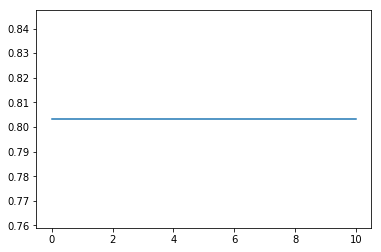

In [14]:
hist = model.get_agents()
def plot_fit(hist, func):
    best_fit = []
    for it in hist:
        fits = [func(x) for x in it]
        best_fit.append(min(fits).copy())
        
    plt.plot(best_fit, label = str(func))
plot_fit(hist, objectfunction)

## Visualization Path

In [21]:
hist = np.array(hist).reshape(-1,5)

In [19]:
from sklearn.decomposition import IncrementalPCA

In [20]:
ipca = IncrementalPCA(n_components=2, batch_size=3)

In [22]:
ipca.fit(hist)

IncrementalPCA(batch_size=3, copy=True, n_components=2, whiten=False)

In [23]:
new = ipca.transform(hist)

In [25]:
new = new.reshape(11,20,2)

In [26]:
new.shape

(11, 20, 2)

([], <a list of 0 Text yticklabel objects>)

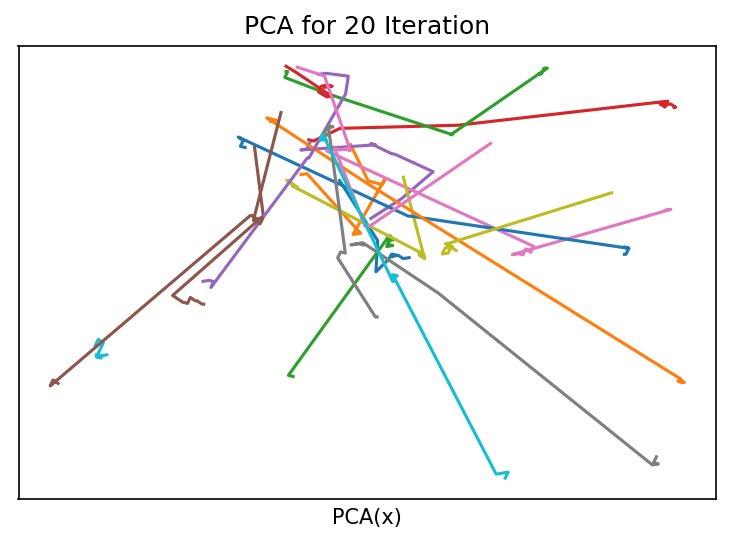

In [35]:
plt.figure(dpi=150)
for i in range(20):
    plt.plot(new[:,i,0], new[:,i,1])
plt.xlabel("PCA(x)")
plt.title("PCA for 20 Iteration")
plt.xticks([])
plt.yticks([])

## Plot Search Table

In [55]:
import re
p = re.compile('\d')

arch = []
errors = []
for key,err in table.items():
    x = re.findall(p, key)
    arch.append(x)
    errors.append(err)

In [56]:
arch = [list(map(int, arch[i])) for i in range(len(arch))]

In [60]:
arch = np.array(arch)
errors = np.array(errors)

In [71]:
blocks = []
for i in range(5):
    block = []
    for j in range(1,6):
        mask = arch[:,i]==j
        m = np.min(errors[mask])
        block.append([j, m])
    blocks.append(block)

In [74]:
blocks = np.array(blocks)
blocks.shape

(5, 5, 2)

Text(0, 0.5, 'Error')

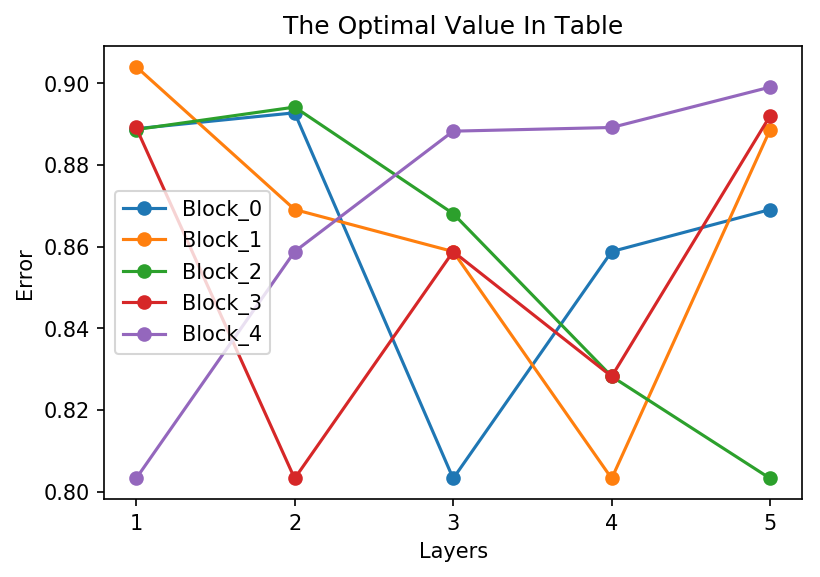

In [81]:
plt.figure(dpi=150)
for i,b in enumerate(blocks):
    label = "Block_" + str(i)
    plt.plot(b[:,0], b[:,1],"-o", label =label)
    
plt.legend()
plt.title("The Optimal Value In Table")
plt.xticks([1,2,3,4,5])
plt.xlabel("Layers")
plt.ylabel("Error")

##  Optimal Architecture

In [83]:
min(table,key=table.get)

'[3, 4, 5, 2, 1]'

In [73]:
bestmodel = generate_model([3,4,5,2,1])

In [74]:
bestmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 64)        0         
__________

In [75]:
bestmodel.compile(
#                 optimizer="adam",
               optimizer=k.optimizers.SGD(lr=1e-2),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
res = bestmodel.fit(x_train, y_train, batch_size=256, epochs=3,  validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 56s 1ms/step - loss: 2.2694 - acc: 0.2042 - val_loss: 3.1225 - val_acc: 0.1000
Epoch 2/3
50000/50000 [==============================] - 54s 1ms/step - loss: 1.7928 - acc: 0.3305 - val_loss: 3.3663 - val_acc: 0.1246
Epoch 3/3
50000/50000 [==============================] - 55s 1ms/step - loss: 1.5978 - acc: 0.4017 - val_loss: 2.5794 - val_acc: 0.2319


## Reset session

In [102]:
k.backend.clear_session()
tf.reset_default_graph()

## Save Model

In [33]:
bestmodel.save("bestmodel.h5")

## load Model

In [87]:
bestmodel = k.models.load_model("bestmodel.h5")

## Compute Matrix

In [88]:
res = bestmodel.predict(x_test)
predict = np.argmax(res, axis = 1)
ground_truth = np.argmax(y_test, axis=1)

In [91]:
total =  []
for i in range(10):
    pre = predict[ground_truth == i]
    pre = list(pre)
    l = []
    for j in range(10):
        c = pre.count(j)
        l.append(c)
    total.append(l)
mat = np.array(total)

In [93]:
classes = ['airplane',
           'automobile',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck',
          ]

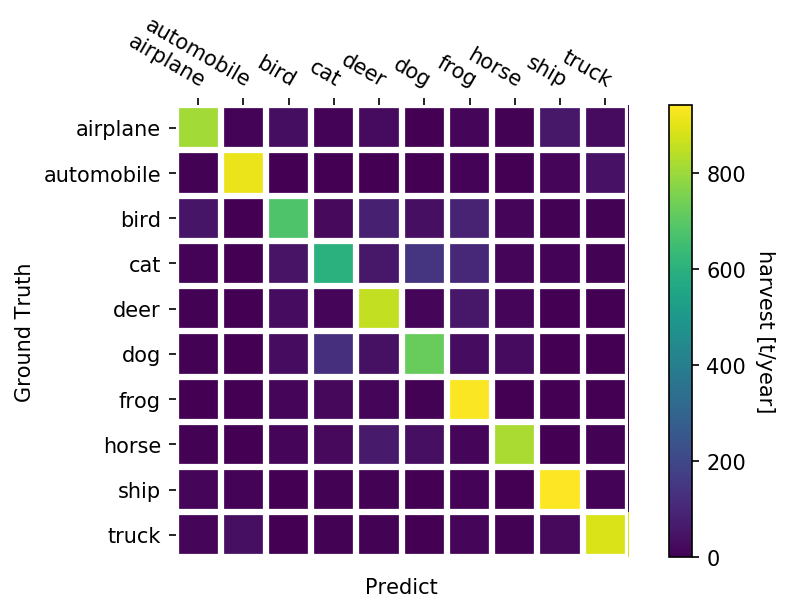

In [94]:
fig, ax = plt.subplots(dpi = 150)

im, cbar = heatmap(mat, classes, classes, ax=ax,
                    cbarlabel="harvest [t/year]")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.xlabel("Predict",verticalalignment="top")
plt.ylabel("Ground Truth")
plt.show()

In [85]:
print(mat)

[[148   8 149  91 193  16 122 121  61  91]
 [  7  88   6  10  59   1 343  92   5 389]
 [ 12   1  58  63 636  17 185  22   3   3]
 [  2   1  18  36 465  25 428  23   1   1]
 [  5   0  16  14 723   6 210  25   0   1]
 [  1   0  10  45 516  53 334  41   0   0]
 [  0   0   4   6 418   0 569   3   0   0]
 [  0   0   7  16 419  14 318 224   0   2]
 [ 98  31 116  65 218   3 146  66 135 122]
 [  5  10   4  14  71   0 491 117   3 285]]
